In [1]:
import matplotlib.pyplot as plt
import numpy as np
from column_generation import * 

# Initiate the network

Below, we define the parameters of our graphs. We have decided to use an Erdos Renyi graph, which is a random graph. It is constructed by specifying the number of nodes and the probability that an edge exists. To have a complete graph, we just have to set it to 1. Otherwise, it will generate randomly a sparse graph.  
In the function *generate_path()*, we also initialise the capacity value of each edge to 0 and the cost value of each edge to a random value between 1 and 5.

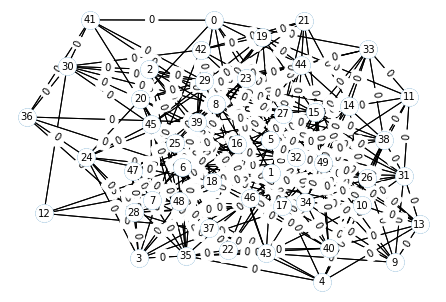

In [9]:
graph = generate_graph("erdos_renyi_graph", n=50, p=0.2)
pos = nx.spring_layout(graph)
print_whole_graph(graph)
plt.show()

After that, we specify the parameters of our problem. The function *generate_demand()* takes as parameters the number of demands that we want to create and the lower and upper bound between which the traffic value of a demand will be defined. It returns a list of traffic value for each demand.  
Given this list, the function *generate_source_target()* then creates a random path between a node source and a node target from our graph for each demand. It returns the list of source nodes and its corresponding of target nodes.  
Given these two lists, the function *generate_shortest_paths()* then initialise our graph with the shortest path between a source node and its corresponding target node.  
We then have to associate each demand to its corresponding shortest path. The dictionnary will then be used to retrieve the list of paths used to respond to a specific demand.

In [10]:
demands = generate_demand(500,5,10)
sources, targets = generate_source_target(len(demands), graph)
initial_paths = generate_shortest_paths(graph, sources, targets)

In [11]:
# chemin associé à mes demandes
list_of_paths = dict()
for i in range(len(demands)):
    list_of_paths[f'demand_{i}'] = [initial_paths[i]]
    
print(list_of_paths)

{'demand_0': [[37, 12, 6, 36]], 'demand_1': [[45, 1, 44]], 'demand_2': [[47, 5, 31]], 'demand_3': [[14, 29, 30]], 'demand_4': [[39, 18, 12]], 'demand_5': [[21, 42, 28]], 'demand_6': [[18, 1, 17]], 'demand_7': [[40, 1, 4]], 'demand_8': [[9, 13, 5, 47]], 'demand_9': [[13, 5, 15]], 'demand_10': [[0, 24, 36]], 'demand_11': [[3, 24, 6]], 'demand_12': [[13, 9]], 'demand_13': [[35, 32]], 'demand_14': [[46, 3, 28]], 'demand_15': [[48, 20, 6]], 'demand_16': [[13, 4]], 'demand_17': [[40, 1, 20, 30]], 'demand_18': [[44, 38]], 'demand_19': [[49, 6, 27]], 'demand_20': [[12, 18, 16]], 'demand_21': [[38, 8]], 'demand_22': [[6, 20, 29]], 'demand_23': [[43, 1, 40]], 'demand_24': [[7, 17, 9]], 'demand_25': [[41, 29, 42]], 'demand_26': [[38, 10, 14]], 'demand_27': [[20, 6, 41]], 'demand_28': [[14, 21]], 'demand_29': [[10, 27, 47]], 'demand_30': [[44, 1, 6]], 'demand_31': [[21, 42, 28]], 'demand_32': [[16, 20]], 'demand_33': [[4, 1, 6]], 'demand_34': [[2, 25, 49]], 'demand_35': [[10, 34, 3]], 'demand_36':

Using this cell, one can visualize the different initial shortest path of the graph:

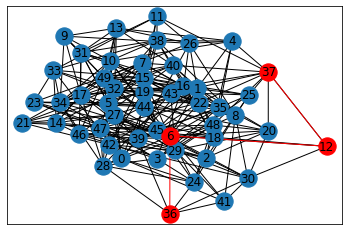

In [12]:
print_one_path(graph, initial_paths[0])
plt.show()

Now that the problem and the graph are ready, we can pass to the resolution of the problem and to the dimensionning of our network.

# Solve the problem

To control our resolution, we initialise with a temporary value our objective function that we set up to $\infty$. At each step we will then be able to check if the value as decreased or not and thus decide if we procede have reached the optimal solution or if it can be improved.  
In the function *create_master_problem()*, we pass as an input the graph, the list of paths and the list of demands. These 3 elements will be used to create the variables of our problem and initialise the solver. The problem is then solved and the graph is updated with the new capacity values.  
Once that step is done, we generate a new list of shortest paths for our demands, based on the capacity values of each edge, and update with them the list of paths. They correspond to the new columns that we add to our problem. We then solve once again the problem and look at the objective function value.

In [13]:
obj_function_ref = np.inf

_, problem = create_master_problem(graph, list_of_paths, demands)
iteration_cpt = 1
new_obj_function= problem.objective.value()
while obj_function_ref > new_obj_function:
    new_paths = generate_shortest_paths(graph, sources, targets)
    for i in range(len(new_paths)):
        list_of_paths[f'demand_{i}'].append(new_paths[i])
    graph, problem = create_master_problem(graph, list_of_paths, demands)
    obj_function_ref = new_obj_function
    new_obj_function = problem.objective.value()
    iteration_cpt+=1
print(f"Number of iterations = {iteration_cpt}")

Number of iterations = 10


Once the resolution is done and the network is dimensionned, we can use the cell below to take a look to the resulting network and see the capacities of the different edges.

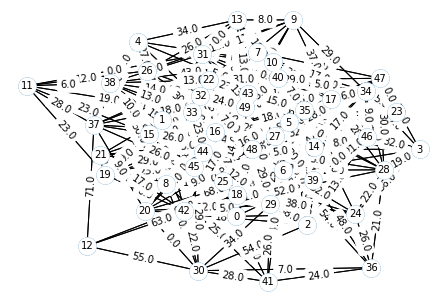

In [14]:
print_whole_graph(graph)

Below is the final state of the problem and the reduced cost of each variable.

In [15]:
print(problem)

for v in problem.variables():
    print(v.name, "=", v.varValue, "Reduced Cost", v.dj)

Master_problem:
MINIMIZE
1*y0 + 4*y1 + 4*y10 + 2*y100 + 3*y101 + 4*y102 + 2*y103 + 4*y104 + 4*y105 + 2*y106 + 3*y107 + 3*y108 + 3*y109 + 2*y11 + 1*y110 + 1*y111 + 1*y112 + 4*y113 + 1*y114 + 3*y115 + 4*y116 + 3*y117 + 3*y118 + 1*y119 + 1*y12 + 2*y120 + 1*y121 + 4*y122 + 1*y123 + 3*y124 + 2*y125 + 4*y126 + 2*y127 + 2*y128 + 4*y129 + 1*y13 + 2*y130 + 2*y131 + 2*y132 + 3*y133 + 1*y134 + 2*y135 + 4*y136 + 2*y137 + 2*y138 + 2*y139 + 3*y14 + 4*y140 + 3*y141 + 3*y142 + 3*y143 + 1*y144 + 1*y145 + 4*y146 + 1*y147 + 1*y148 + 4*y149 + 2*y15 + 1*y150 + 3*y151 + 4*y152 + 3*y153 + 3*y154 + 1*y155 + 3*y156 + 4*y157 + 4*y158 + 4*y159 + 1*y16 + 4*y160 + 3*y161 + 2*y162 + 3*y163 + 2*y164 + 4*y165 + 2*y166 + 3*y167 + 1*y168 + 3*y169 + 4*y17 + 2*y170 + 4*y171 + 1*y172 + 3*y173 + 4*y174 + 4*y175 + 2*y176 + 1*y177 + 3*y178 + 3*y179 + 3*y18 + 4*y180 + 1*y181 + 1*y182 + 2*y183 + 2*y184 + 3*y185 + 1*y186 + 2*y187 + 3*y188 + 2*y189 + 1*y19 + 1*y190 + 4*y191 + 3*y192 + 4*y193 + 4*y194 + 1*y195 + 3*y196 + 1*y197 +

x1065 = 0.0 Reduced Cost 0.0
x1066 = 0.0 Reduced Cost 0.0
x1067 = 0.0 Reduced Cost 0.0
x1068 = 0.0 Reduced Cost 0.0
x1069 = 0.0 Reduced Cost 0.0
x107 = 0.0 Reduced Cost 0.0
x1070 = 6.0 Reduced Cost 0.0
x1071 = 0.0 Reduced Cost 0.0
x1072 = 0.0 Reduced Cost 0.0
x1073 = 0.0 Reduced Cost 0.0
x1074 = 0.0 Reduced Cost 0.0
x1075 = 0.0 Reduced Cost 0.0
x1076 = 0.0 Reduced Cost 0.0
x1077 = 0.0 Reduced Cost 0.0
x1078 = 0.0 Reduced Cost 0.0
x1079 = 0.0 Reduced Cost 0.0
x108 = 0.0 Reduced Cost 0.0
x1080 = 0.0 Reduced Cost 0.0
x1081 = 0.0 Reduced Cost 0.0
x1082 = 0.0 Reduced Cost 0.0
x1083 = 5.0 Reduced Cost 0.0
x1084 = 0.0 Reduced Cost 0.0
x1085 = 0.0 Reduced Cost 0.0
x1086 = 0.0 Reduced Cost 0.0
x1087 = 0.0 Reduced Cost 0.0
x1088 = 0.0 Reduced Cost 0.0
x1089 = 0.0 Reduced Cost 0.0
x109 = 0.0 Reduced Cost 0.0
x1090 = 0.0 Reduced Cost 0.0
x1091 = 0.0 Reduced Cost 0.0
x1092 = 0.0 Reduced Cost 0.0
x1093 = 0.0 Reduced Cost 0.0
x1094 = 5.0 Reduced Cost 0.0
x1095 = 0.0 Reduced Cost 0.0
x1096 = 0.0 Reduc

x1498 = 0.0 Reduced Cost 0.0
x1499 = 0.0 Reduced Cost 0.0
x15 = 0.0 Reduced Cost 0.0
x150 = 9.0 Reduced Cost 0.0
x1500 = 9.0 Reduced Cost 0.0
x1501 = 0.0 Reduced Cost 0.0
x1502 = 0.0 Reduced Cost 0.0
x1503 = 0.0 Reduced Cost 0.0
x1504 = 0.0 Reduced Cost 0.0
x1505 = 0.0 Reduced Cost 0.0
x1506 = 0.0 Reduced Cost 0.0
x1507 = 0.0 Reduced Cost 0.0
x1508 = 0.0 Reduced Cost 0.0
x1509 = 0.0 Reduced Cost 0.0
x151 = 0.0 Reduced Cost 0.0
x1510 = 9.0 Reduced Cost 0.0
x1511 = 0.0 Reduced Cost 0.0
x1512 = 0.0 Reduced Cost 0.0
x1513 = 0.0 Reduced Cost 0.0
x1514 = 0.0 Reduced Cost 0.0
x1515 = 0.0 Reduced Cost 0.0
x1516 = 0.0 Reduced Cost 0.0
x1517 = 0.0 Reduced Cost 0.0
x1518 = 0.0 Reduced Cost 0.0
x1519 = 0.0 Reduced Cost 0.0
x152 = 0.0 Reduced Cost 0.0
x1520 = 7.0 Reduced Cost 0.0
x1521 = 0.0 Reduced Cost 0.0
x1522 = 0.0 Reduced Cost 0.0
x1523 = 0.0 Reduced Cost 0.0
x1524 = 0.0 Reduced Cost 0.0
x1525 = 0.0 Reduced Cost 0.0
x1526 = 0.0 Reduced Cost 0.0
x1527 = 0.0 Reduced Cost 0.0
x1528 = 0.0 Reduced

x1948 = 0.0 Reduced Cost 0.0
x1949 = 0.0 Reduced Cost 0.0
x195 = 0.0 Reduced Cost 0.0
x1950 = 7.0 Reduced Cost 0.0
x1951 = 0.0 Reduced Cost 0.0
x1952 = 0.0 Reduced Cost 0.0
x1953 = 0.0 Reduced Cost 0.0
x1954 = 0.0 Reduced Cost 0.0
x1955 = 0.0 Reduced Cost 0.0
x1956 = 0.0 Reduced Cost 0.0
x1957 = 0.0 Reduced Cost 0.0
x1958 = 0.0 Reduced Cost 0.0
x1959 = 0.0 Reduced Cost 0.0
x196 = 0.0 Reduced Cost 0.0
x1960 = 0.0 Reduced Cost 0.0
x1961 = 7.0 Reduced Cost 0.0
x1962 = 0.0 Reduced Cost 0.0
x1963 = 0.0 Reduced Cost 0.0
x1964 = 0.0 Reduced Cost 0.0
x1965 = 0.0 Reduced Cost 0.0
x1966 = 0.0 Reduced Cost 0.0
x1967 = 0.0 Reduced Cost 0.0
x1968 = 0.0 Reduced Cost 0.0
x1969 = 0.0 Reduced Cost 0.0
x197 = 0.0 Reduced Cost 0.0
x1970 = 8.0 Reduced Cost 0.0
x1971 = 0.0 Reduced Cost 0.0
x1972 = 0.0 Reduced Cost 0.0
x1973 = 0.0 Reduced Cost 0.0
x1974 = 0.0 Reduced Cost 0.0
x1975 = 0.0 Reduced Cost 0.0
x1976 = 0.0 Reduced Cost 0.0
x1977 = 0.0 Reduced Cost 0.0
x1978 = 0.0 Reduced Cost 0.0
x1979 = 0.0 Reduc

x2489 = 0.0 Reduced Cost 0.0
x249 = 0.0 Reduced Cost 0.0
x2490 = 0.0 Reduced Cost 0.0
x2491 = 8.0 Reduced Cost 0.0
x2492 = 0.0 Reduced Cost 0.0
x2493 = 0.0 Reduced Cost 0.0
x2494 = 0.0 Reduced Cost 0.0
x2495 = 0.0 Reduced Cost 0.0
x2496 = 0.0 Reduced Cost 0.0
x2497 = 0.0 Reduced Cost 0.0
x2498 = 0.0 Reduced Cost 0.0
x2499 = 0.0 Reduced Cost 0.0
x25 = 0.0 Reduced Cost 0.0
x250 = 0.0 Reduced Cost 0.0
x2500 = 8.0 Reduced Cost 0.0
x2501 = 0.0 Reduced Cost 0.0
x2502 = 0.0 Reduced Cost 0.0
x2503 = 0.0 Reduced Cost 0.0
x2504 = 0.0 Reduced Cost 0.0
x2505 = 0.0 Reduced Cost 0.0
x2506 = 0.0 Reduced Cost 0.0
x2507 = 0.0 Reduced Cost 0.0
x2508 = 0.0 Reduced Cost 0.0
x2509 = 0.0 Reduced Cost 0.0
x251 = 6.0 Reduced Cost 0.0
x2510 = 5.0 Reduced Cost 0.0
x2511 = 0.0 Reduced Cost 0.0
x2512 = 0.0 Reduced Cost 0.0
x2513 = 0.0 Reduced Cost 0.0
x2514 = 0.0 Reduced Cost 0.0
x2515 = 0.0 Reduced Cost 0.0
x2516 = 0.0 Reduced Cost 0.0
x2517 = 0.0 Reduced Cost 0.0
x2518 = 0.0 Reduced Cost 0.0
x2519 = 0.0 Reduced

x2875 = 0.0 Reduced Cost 0.0
x2876 = 0.0 Reduced Cost 0.0
x2877 = 0.0 Reduced Cost 0.0
x2878 = 0.0 Reduced Cost 0.0
x2879 = 0.0 Reduced Cost 0.0
x288 = 0.0 Reduced Cost 0.0
x2880 = 0.0 Reduced Cost 0.0
x2881 = 0.0 Reduced Cost 0.0
x2882 = 0.0 Reduced Cost 0.0
x2883 = 0.0 Reduced Cost 0.0
x2884 = 0.0 Reduced Cost 0.0
x2885 = 0.0 Reduced Cost 0.0
x2886 = 0.0 Reduced Cost 0.0
x2887 = 0.0 Reduced Cost 0.0
x2888 = 0.0 Reduced Cost 0.0
x2889 = 8.0 Reduced Cost 0.0
x289 = 0.0 Reduced Cost 0.0
x2890 = 5.0 Reduced Cost 0.0
x2891 = 0.0 Reduced Cost 0.0
x2892 = 0.0 Reduced Cost 0.0
x2893 = 0.0 Reduced Cost 0.0
x2894 = 0.0 Reduced Cost 0.0
x2895 = 0.0 Reduced Cost 0.0
x2896 = 0.0 Reduced Cost 0.0
x2897 = 0.0 Reduced Cost 0.0
x2898 = 0.0 Reduced Cost 0.0
x2899 = 0.0 Reduced Cost 0.0
x29 = 0.0 Reduced Cost 0.0
x290 = 7.0 Reduced Cost 0.0
x2900 = 6.0 Reduced Cost 0.0
x2901 = 0.0 Reduced Cost 0.0
x2902 = 0.0 Reduced Cost 0.0
x2903 = 0.0 Reduced Cost 0.0
x2904 = 0.0 Reduced Cost 0.0
x2905 = 0.0 Reduced

x3299 = 0.0 Reduced Cost 0.0
x33 = 0.0 Reduced Cost 0.0
x330 = 7.0 Reduced Cost 0.0
x3300 = 0.0 Reduced Cost 0.0
x3301 = 0.0 Reduced Cost 0.0
x3302 = 0.0 Reduced Cost 0.0
x3303 = 7.0 Reduced Cost 0.0
x3304 = 0.0 Reduced Cost 0.0
x3305 = 0.0 Reduced Cost 0.0
x3306 = 0.0 Reduced Cost 0.0
x3307 = 0.0 Reduced Cost 0.0
x3308 = 0.0 Reduced Cost 0.0
x3309 = 0.0 Reduced Cost 0.0
x331 = 0.0 Reduced Cost 0.0
x3310 = 5.0 Reduced Cost 0.0
x3311 = 0.0 Reduced Cost 0.0
x3312 = 0.0 Reduced Cost 0.0
x3313 = 0.0 Reduced Cost 0.0
x3314 = 0.0 Reduced Cost 0.0
x3315 = 0.0 Reduced Cost 0.0
x3316 = 0.0 Reduced Cost 0.0
x3317 = 0.0 Reduced Cost 0.0
x3318 = 0.0 Reduced Cost 0.0
x3319 = 0.0 Reduced Cost 0.0
x332 = 0.0 Reduced Cost 0.0
x3320 = 9.0 Reduced Cost 0.0
x3321 = 0.0 Reduced Cost 0.0
x3322 = 0.0 Reduced Cost 0.0
x3323 = 0.0 Reduced Cost 0.0
x3324 = 0.0 Reduced Cost 0.0
x3325 = 0.0 Reduced Cost 0.0
x3326 = 0.0 Reduced Cost 0.0
x3327 = 0.0 Reduced Cost 0.0
x3328 = 0.0 Reduced Cost 0.0
x3329 = 0.0 Reduced

x3647 = 0.0 Reduced Cost 0.0
x3648 = 0.0 Reduced Cost 0.0
x3649 = 0.0 Reduced Cost 0.0
x365 = 0.0 Reduced Cost 0.0
x3650 = 6.0 Reduced Cost 0.0
x3651 = 0.0 Reduced Cost 0.0
x3652 = 0.0 Reduced Cost 0.0
x3653 = 0.0 Reduced Cost 0.0
x3654 = 0.0 Reduced Cost 0.0
x3655 = 0.0 Reduced Cost 0.0
x3656 = 0.0 Reduced Cost 0.0
x3657 = 0.0 Reduced Cost 0.0
x3658 = 0.0 Reduced Cost 0.0
x3659 = 0.0 Reduced Cost 0.0
x366 = 0.0 Reduced Cost 0.0
x3660 = 9.0 Reduced Cost 0.0
x3661 = 0.0 Reduced Cost 0.0
x3662 = 0.0 Reduced Cost 0.0
x3663 = 0.0 Reduced Cost 0.0
x3664 = 0.0 Reduced Cost 0.0
x3665 = 0.0 Reduced Cost 0.0
x3666 = 0.0 Reduced Cost 0.0
x3667 = 0.0 Reduced Cost 0.0
x3668 = 0.0 Reduced Cost 0.0
x3669 = 0.0 Reduced Cost 0.0
x367 = 0.0 Reduced Cost 0.0
x3670 = 0.0 Reduced Cost 0.0
x3671 = 0.0 Reduced Cost 0.0
x3672 = 0.0 Reduced Cost 0.0
x3673 = 9.0 Reduced Cost 0.0
x3674 = 0.0 Reduced Cost 0.0
x3675 = 0.0 Reduced Cost 0.0
x3676 = 0.0 Reduced Cost 0.0
x3677 = 0.0 Reduced Cost 0.0
x3678 = 0.0 Reduc

x3973 = 0.0 Reduced Cost 0.0
x3974 = 0.0 Reduced Cost 0.0
x3975 = 0.0 Reduced Cost 0.0
x3976 = 0.0 Reduced Cost 0.0
x3977 = 0.0 Reduced Cost 0.0
x3978 = 0.0 Reduced Cost 0.0
x3979 = 0.0 Reduced Cost 0.0
x398 = 0.0 Reduced Cost 0.0
x3980 = 5.0 Reduced Cost 0.0
x3981 = 0.0 Reduced Cost 0.0
x3982 = 0.0 Reduced Cost 0.0
x3983 = 0.0 Reduced Cost 0.0
x3984 = 0.0 Reduced Cost 0.0
x3985 = 0.0 Reduced Cost 0.0
x3986 = 0.0 Reduced Cost 0.0
x3987 = 0.0 Reduced Cost 0.0
x3988 = 0.0 Reduced Cost 0.0
x3989 = 0.0 Reduced Cost 0.0
x399 = 0.0 Reduced Cost 0.0
x3990 = 8.0 Reduced Cost 0.0
x3991 = 0.0 Reduced Cost 0.0
x3992 = 0.0 Reduced Cost 0.0
x3993 = 0.0 Reduced Cost 0.0
x3994 = 0.0 Reduced Cost 0.0
x3995 = 0.0 Reduced Cost 0.0
x3996 = 0.0 Reduced Cost 0.0
x3997 = 0.0 Reduced Cost 0.0
x3998 = 0.0 Reduced Cost 0.0
x3999 = 0.0 Reduced Cost 0.0
x40 = 0.0 Reduced Cost 0.0
x400 = 9.0 Reduced Cost 0.0
x4000 = 6.0 Reduced Cost 0.0
x4001 = 0.0 Reduced Cost 0.0
x4002 = 0.0 Reduced Cost 0.0
x4003 = 0.0 Reduced

x4391 = 0.0 Reduced Cost 0.0
x4392 = 0.0 Reduced Cost 0.0
x4393 = 0.0 Reduced Cost 0.0
x4394 = 0.0 Reduced Cost 0.0
x4395 = 0.0 Reduced Cost 0.0
x4396 = 0.0 Reduced Cost 0.0
x4397 = 0.0 Reduced Cost 0.0
x4398 = 0.0 Reduced Cost 0.0
x4399 = 8.0 Reduced Cost 0.0
x44 = 0.0 Reduced Cost 0.0
x440 = 0.0 Reduced Cost 0.0
x4400 = 7.0 Reduced Cost 0.0
x4401 = 0.0 Reduced Cost 0.0
x4402 = 0.0 Reduced Cost 0.0
x4403 = 0.0 Reduced Cost 0.0
x4404 = 0.0 Reduced Cost 0.0
x4405 = 0.0 Reduced Cost 0.0
x4406 = 0.0 Reduced Cost 0.0
x4407 = 0.0 Reduced Cost 0.0
x4408 = 0.0 Reduced Cost 0.0
x4409 = 0.0 Reduced Cost 0.0
x441 = 0.0 Reduced Cost 0.0
x4410 = 6.0 Reduced Cost 0.0
x4411 = 0.0 Reduced Cost 0.0
x4412 = 0.0 Reduced Cost 0.0
x4413 = 0.0 Reduced Cost 0.0
x4414 = 0.0 Reduced Cost 0.0
x4415 = 0.0 Reduced Cost 0.0
x4416 = 0.0 Reduced Cost 0.0
x4417 = 0.0 Reduced Cost 0.0
x4418 = 0.0 Reduced Cost 0.0
x4419 = 0.0 Reduced Cost 0.0
x442 = 0.0 Reduced Cost 0.0
x4420 = 0.0 Reduced Cost 0.0
x4421 = 0.0 Reduced

x4752 = 0.0 Reduced Cost 0.0
x4753 = 0.0 Reduced Cost 0.0
x4754 = 0.0 Reduced Cost 0.0
x4755 = 0.0 Reduced Cost 0.0
x4756 = 0.0 Reduced Cost 0.0
x4757 = 0.0 Reduced Cost 0.0
x4758 = 0.0 Reduced Cost 0.0
x4759 = 0.0 Reduced Cost 0.0
x476 = 0.0 Reduced Cost 0.0
x4760 = 9.0 Reduced Cost 0.0
x4761 = 0.0 Reduced Cost 0.0
x4762 = 0.0 Reduced Cost 0.0
x4763 = 0.0 Reduced Cost 0.0
x4764 = 0.0 Reduced Cost 0.0
x4765 = 0.0 Reduced Cost 0.0
x4766 = 0.0 Reduced Cost 0.0
x4767 = 0.0 Reduced Cost 0.0
x4768 = 0.0 Reduced Cost 0.0
x4769 = 0.0 Reduced Cost 0.0
x477 = 0.0 Reduced Cost 0.0
x4770 = 5.0 Reduced Cost 0.0
x4771 = 0.0 Reduced Cost 0.0
x4772 = 0.0 Reduced Cost 0.0
x4773 = 0.0 Reduced Cost 0.0
x4774 = 0.0 Reduced Cost 0.0
x4775 = 0.0 Reduced Cost 0.0
x4776 = 0.0 Reduced Cost 0.0
x4777 = 0.0 Reduced Cost 0.0
x4778 = 0.0 Reduced Cost 0.0
x4779 = 0.0 Reduced Cost 0.0
x478 = 0.0 Reduced Cost 0.0
x4780 = 6.0 Reduced Cost 0.0
x4781 = 0.0 Reduced Cost 0.0
x4782 = 0.0 Reduced Cost 0.0
x4783 = 0.0 Reduc

x641 = 0.0 Reduced Cost 0.0
x642 = 0.0 Reduced Cost 0.0
x643 = 0.0 Reduced Cost 0.0
x644 = 0.0 Reduced Cost 0.0
x645 = 0.0 Reduced Cost 0.0
x646 = 0.0 Reduced Cost 0.0
x647 = 0.0 Reduced Cost 0.0
x648 = 0.0 Reduced Cost 0.0
x649 = 0.0 Reduced Cost 0.0
x65 = 9.0 Reduced Cost 0.0
x650 = 0.0 Reduced Cost 0.0
x651 = 0.0 Reduced Cost 0.0
x652 = 0.0 Reduced Cost 0.0
x653 = 0.0 Reduced Cost 0.0
x654 = 0.0 Reduced Cost 0.0
x655 = 9.0 Reduced Cost 0.0
x656 = 0.0 Reduced Cost 0.0
x657 = 0.0 Reduced Cost 0.0
x658 = 0.0 Reduced Cost 0.0
x659 = 0.0 Reduced Cost 0.0
x66 = 0.0 Reduced Cost 0.0
x660 = 8.0 Reduced Cost 0.0
x661 = 0.0 Reduced Cost 0.0
x662 = 0.0 Reduced Cost 0.0
x663 = 0.0 Reduced Cost 0.0
x664 = 0.0 Reduced Cost 0.0
x665 = 0.0 Reduced Cost 0.0
x666 = 0.0 Reduced Cost 0.0
x667 = 0.0 Reduced Cost 0.0
x668 = 0.0 Reduced Cost 0.0
x669 = 0.0 Reduced Cost 0.0
x67 = 0.0 Reduced Cost 0.0
x670 = 0.0 Reduced Cost 0.0
x671 = 0.0 Reduced Cost 0.0
x672 = 0.0 Reduced Cost 0.0
x673 = 0.0 Reduced Cost

x99 = 0.0 Reduced Cost 0.0
x990 = 5.0 Reduced Cost 0.0
x991 = 0.0 Reduced Cost 0.0
x992 = 0.0 Reduced Cost 0.0
x993 = 0.0 Reduced Cost 0.0
x994 = 0.0 Reduced Cost 0.0
x995 = 0.0 Reduced Cost 0.0
x996 = 0.0 Reduced Cost 0.0
x997 = 0.0 Reduced Cost 0.0
x998 = 0.0 Reduced Cost 0.0
x999 = 0.0 Reduced Cost 0.0
y0 = 130.0 Reduced Cost 1.0
y1 = 31.0 Reduced Cost 4.0
y10 = 27.0 Reduced Cost 4.0
y100 = 17.0 Reduced Cost 2.0
y101 = 7.0 Reduced Cost 3.0
y102 = 47.0 Reduced Cost 4.0
y103 = 22.0 Reduced Cost 2.0
y104 = 6.0 Reduced Cost 4.0
y105 = 8.0 Reduced Cost 4.0
y106 = 17.0 Reduced Cost 2.0
y107 = 43.0 Reduced Cost 3.0
y108 = 14.0 Reduced Cost 3.0
y109 = 7.0 Reduced Cost 3.0
y11 = 50.0 Reduced Cost 2.0
y110 = 23.0 Reduced Cost 1.0
y111 = 23.0 Reduced Cost 1.0
y112 = 12.0 Reduced Cost 1.0
y113 = 0.0 Reduced Cost 4.0
y114 = 19.0 Reduced Cost 1.0
y115 = 28.0 Reduced Cost 3.0
y116 = 6.0 Reduced Cost 4.0
y117 = 63.0 Reduced Cost 3.0
y118 = 55.0 Reduced Cost 3.0
y119 = 71.0 Reduced Cost 1.0
y12 = 24